In [1]:
# imports
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from networkx.algorithms import bipartite

%matplotlib inline

In [4]:
# read in the speed dating data
df = pd.read_csv('./speed_dating.csv')

In [33]:
# clean up data frame
# TODO: deal with NaNs (columns w/ only NaNs and columns partially filled w/ NaNs)

# dropping variables that should be useless (FIX AS NECESSARY)
df.drop('round',axis=1,inplace=True)
df.drop('position',axis=1,inplace=True)
df.drop('positin1',axis=1,inplace=True)
df.drop('order',axis=1,inplace=True)

# variables I don't understand: int_corr,

# may want to create variables off of: age, race, from, activities (sports, tvsports, etc.),
#   various attribute ratings for the various categories at each time step

df.head()

,iid,id,gender,idg,condtn,wave,partner,pid,match,int_corr,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,1,11.0,0,0.14,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,2,12.0,0,0.54,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,3,13.0,1,0.16,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,4,14.0,1,0.61,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,5,15.0,1,0.21,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [36]:
# node attributes of import
node_attr = ['gender', 'field_cd', 'career_c']

# create graphs for each wave
waves = df['wave'].unique()
graphs = list()

for w in waves:
    dta = df.loc[df['wave'] == w]
    # TODO: figure out what other edge attributes to include
    G = nx.from_pandas_dataframe(dta,'iid','pid',edge_attr=['match','samerace'])
    
    # set node attributes
    # TODO: figure out what other node attributes to include
    for a in node_attr:
        attr = dta[['iid',a]]
        attr = attr.set_index('iid').T.to_dict('records')[0] # convert to dictionary
        nx.set_node_attributes(G,a,attr)
    
    G = nx.convert_node_labels_to_integers(G,first_label=1)
    graphs.append(G)

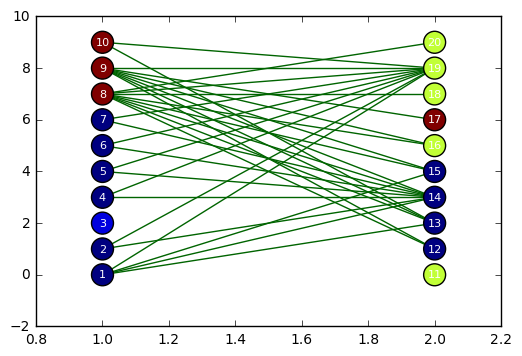

In [37]:
G = graphs[0] # for test value <-- id labels for wave 5 are off (causes an error)

# draw as bipartite graph
X,Y = bipartite.sets(G)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2

# draw only edges where the two people matched
matches = list()
for u,v in G.edges():
    if G[u][v]['match'] == 1:
        matches.append( (u,v) )

# get specified attribute for each node
attr = nx.get_node_attributes(G,'field_cd').values()
        
nx.draw_networkx_nodes(G,pos,node_color=attr,node_size=250)
nx.draw_networkx_labels(G,pos,font_color='white',font_size=8)
nx.draw_networkx_edges(G,pos,edgelist=matches,edge_color='darkgreen')

In [38]:
attr

[1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 13.0,
 13.0,
 13.0,
 8.0,
 1.0,
 1.0,
 1.0,
 1.0,
 8.0,
 13.0,
 8.0,
 8.0,
 8.0]